In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad, Adadelta
from tensorflow.keras.losses import BinaryCrossentropy, Hinge, SquaredHinge, CategoricalCrossentropy, MeanSquaredError, Poisson
import matplotlib.pyplot as plt

In [2]:
# Load the creditcard.csv file
data = pd.read_csv('creditcard.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


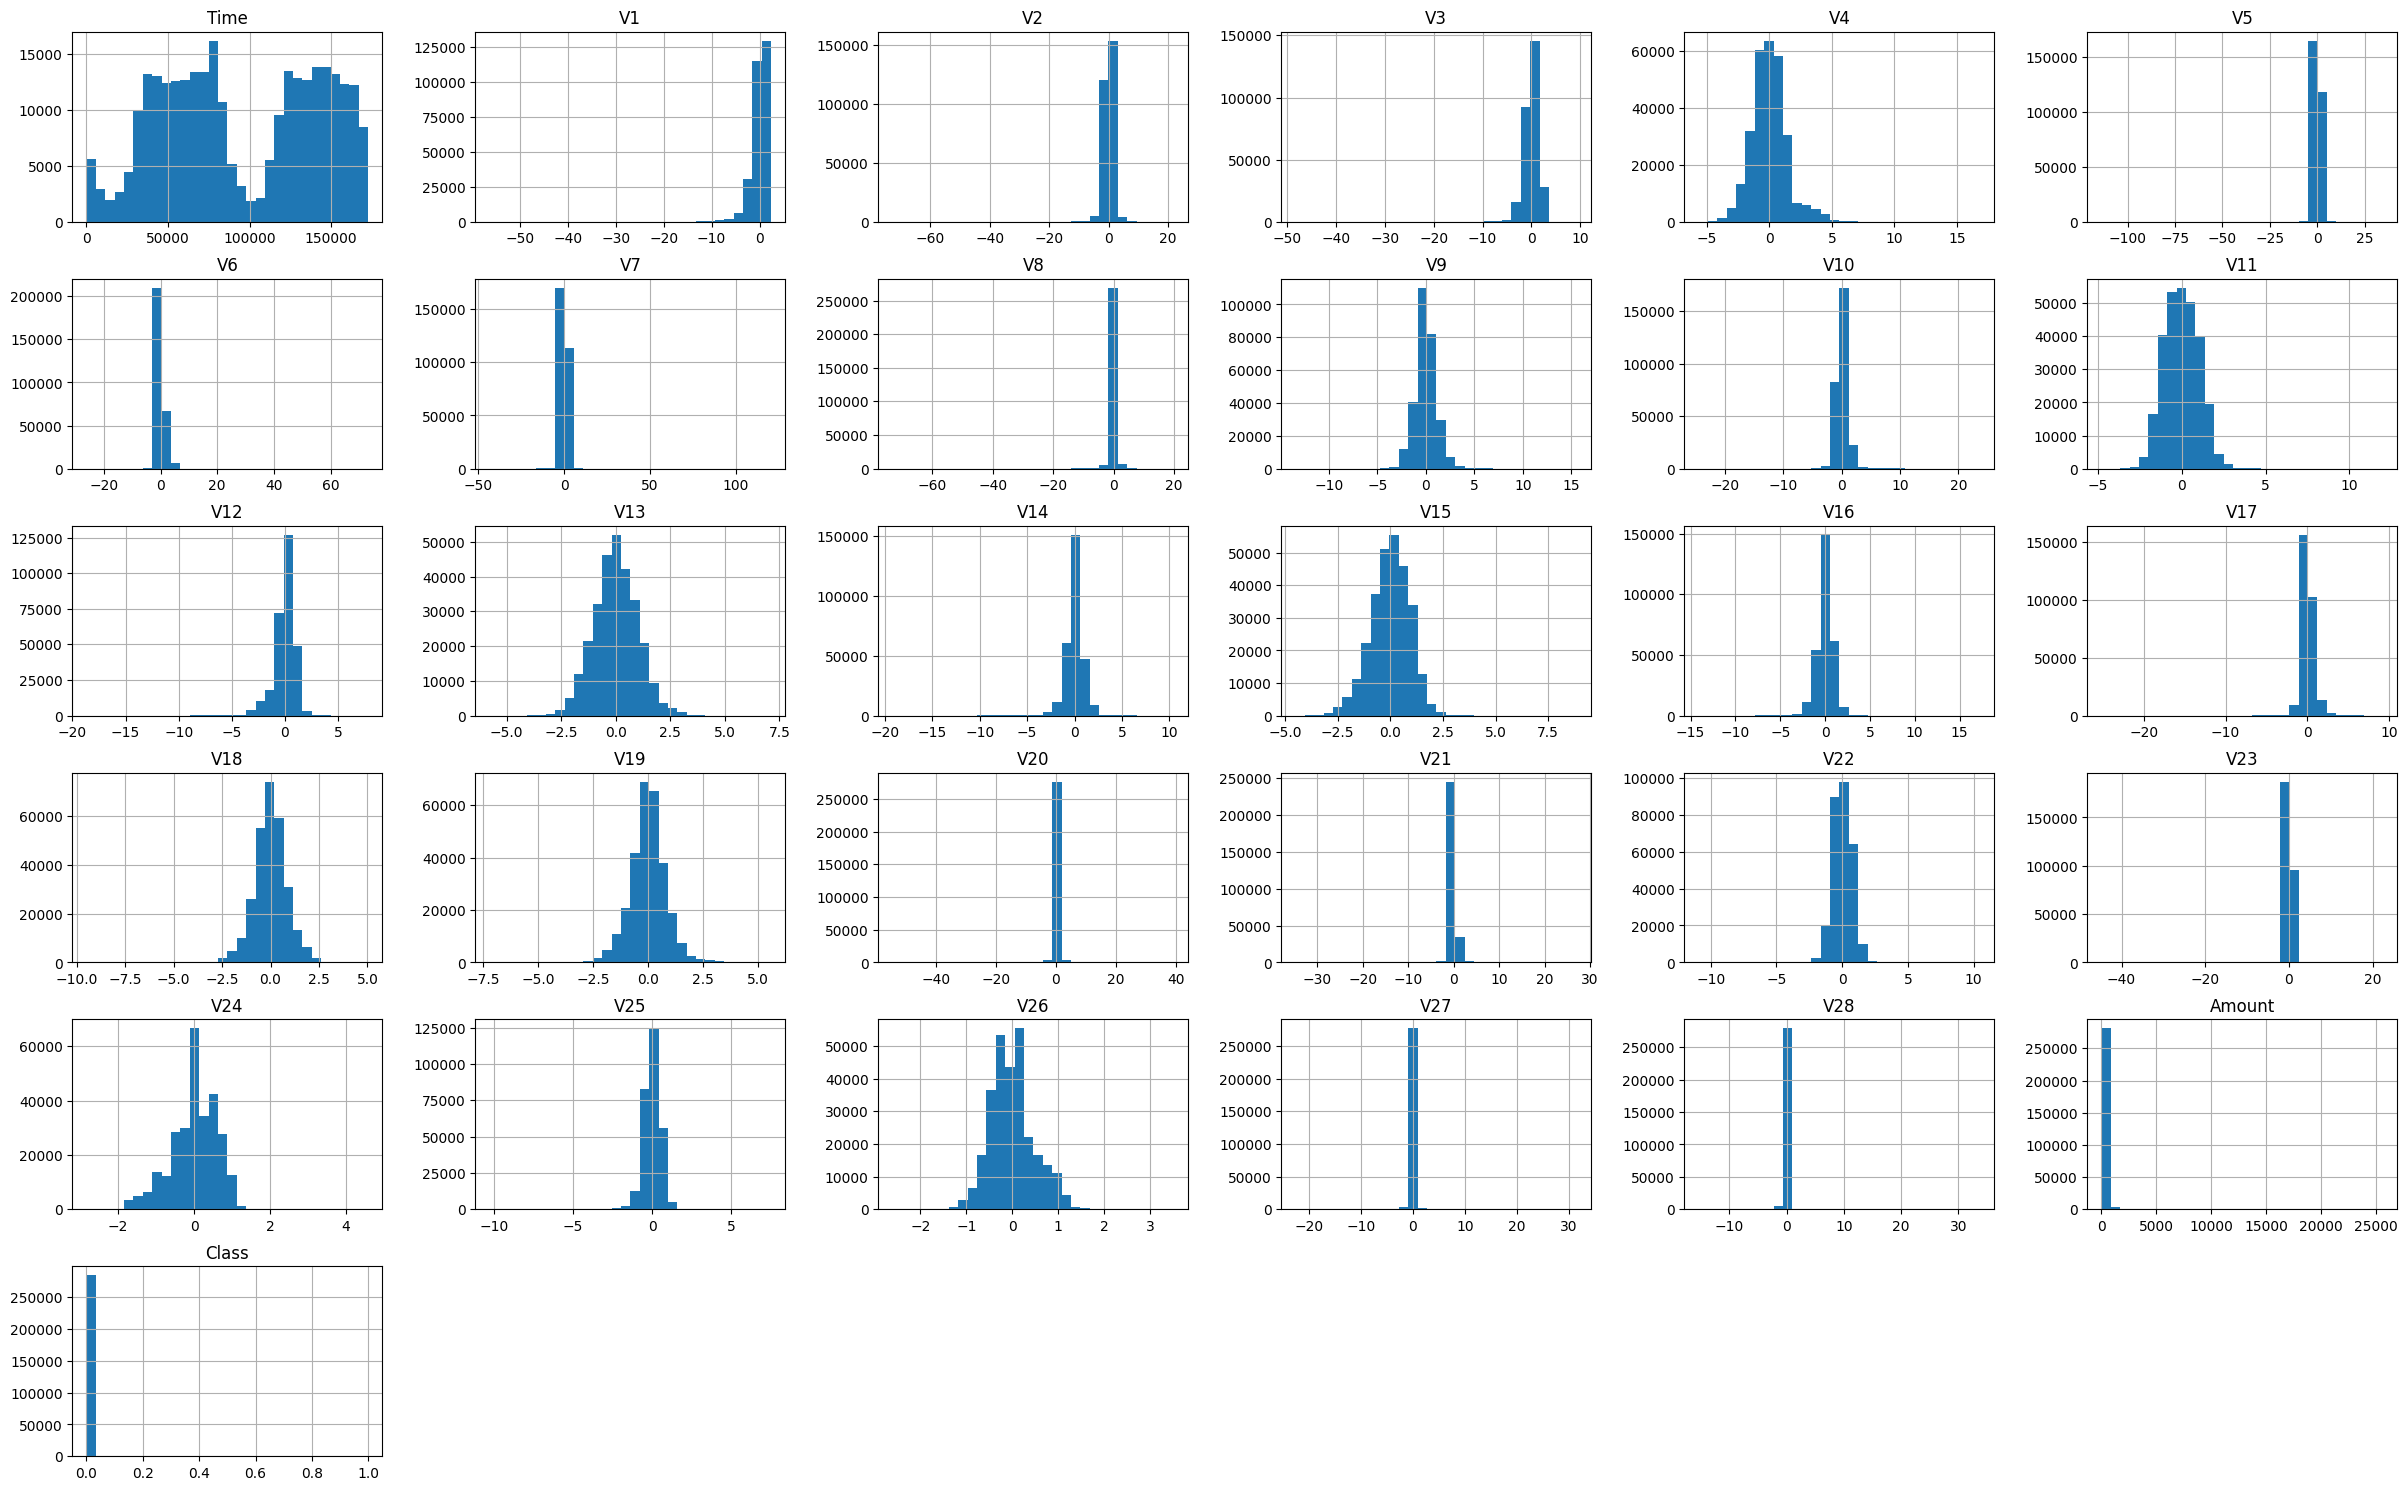

In [7]:
data.hist(bins=30, figsize=(30, 18.5))
plt.show()

In [8]:
data = data.dropna()

In [9]:
# Split the data into training and test sets
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [10]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Epoch 1/20
7121/7121 [==============================] - 29s 4ms/step - loss: 0.0059 - accuracy: 0.9992 - val_loss: 0.0035 - val_accuracy: 0.9992
Epoch 2/20
7121/7121 [==============================] - 26s 4ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0031 - val_accuracy: 0.9993
Epoch 3/20
7121/7121 [==============================] - 28s 4ms/step - loss: 0.0027 - accuracy: 0.9995 - val_loss: 0.0027 - val_accuracy: 0.9994
Epoch 4/20
7121/7121 [==============================] - 26s 4ms/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.0032 - val_accuracy: 0.9993
Epoch 5/20
7121/7121 [==============================] - 25s 3ms/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.0030 - val_accuracy: 0.9994
Epoch 6/20
7121/7121 [==============================] - 27s 4ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.0037 - val_accuracy: 0.9993
Epoch 7/20
7121/7121 [==============================] - 27s 4ms/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.0031 - val_ac

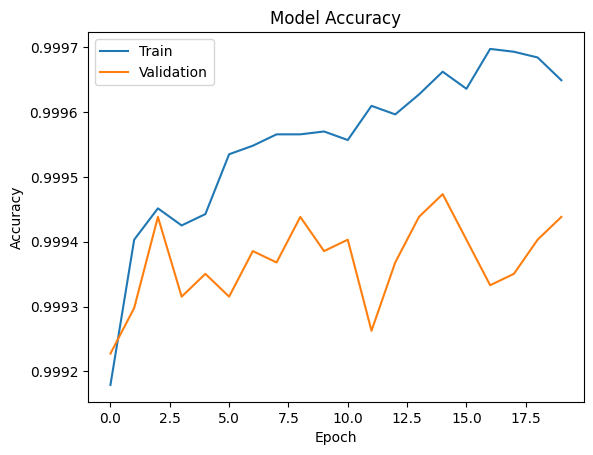

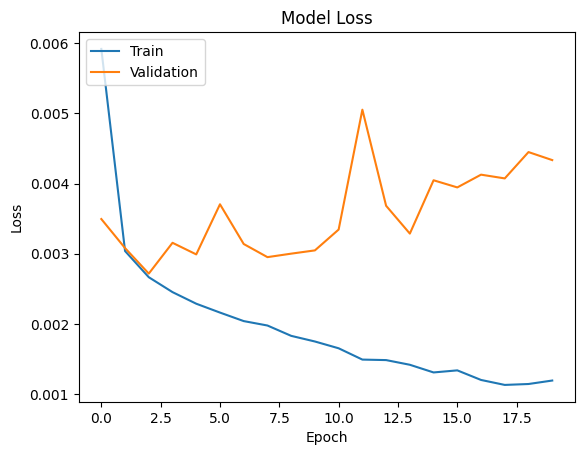

Epoch 1/20
7121/7121 [==============================] - 25s 4ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 0.0050 - val_accuracy: 0.9993
Epoch 2/20
7121/7121 [==============================] - 26s 4ms/step - loss: 9.9583e-04 - accuracy: 0.9997 - val_loss: 0.0042 - val_accuracy: 0.9994
Epoch 3/20
7121/7121 [==============================] - 26s 4ms/step - loss: 9.8271e-04 - accuracy: 0.9997 - val_loss: 0.0050 - val_accuracy: 0.9994
Epoch 4/20
7121/7121 [==============================] - 26s 4ms/step - loss: 8.4143e-04 - accuracy: 0.9997 - val_loss: 0.0055 - val_accuracy: 0.9994
Epoch 5/20
7121/7121 [==============================] - 27s 4ms/step - loss: 9.3152e-04 - accuracy: 0.9997 - val_loss: 0.0057 - val_accuracy: 0.9992
Epoch 6/20
7121/7121 [==============================] - 27s 4ms/step - loss: 0.0010 - accuracy: 0.9997 - val_loss: 0.0046 - val_accuracy: 0.9993
Epoch 7/20
7121/7121 [==============================] - 26s 4ms/step - loss: 8.8252e-04 - accuracy: 0.9998 - val_l

In [11]:
# Define architecture the Deep ANN
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
# Compile the Deep ANN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the Deep ANN
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))
# Evaluate the Deep ANN
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Confusion Matrix:\n', cm)
print('F1 Score:', f1)
print('Precision:', precision)
print('Recall:', recall)
import matplotlib.pyplot as plt

# Plot the training and validation accuracy over time
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss over time
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# Improve the Deep ANN
model.add(tf.keras.layers.Dropout(0.2))
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

In [12]:
# Define the models
models = []
models.append(('Adam', Sequential([Dense(32, activation='relu', input_shape=(30,)), Dropout(0.5), Dense(16, activation='relu'), Dropout(0.5), Dense(1, activation='sigmoid')])))
models.append(('SGD', Sequential([Dense(32, activation='relu', input_shape=(30,)), Dropout(0.5), Dense(16, activation='relu'), Dropout(0.5), Dense(1, activation='sigmoid')])))
models.append(('RMSprop', Sequential([Dense(32, activation='relu', input_shape=(30,)), Dropout(0.5), Dense(16, activation='relu'), Dropout(0.5), Dense(1, activation='sigmoid')])))

models.append(('Adagrad', Sequential([Dense(64, activation='relu', input_shape=(30,)), Dropout(0.2), Dense(32, activation='relu'), Dropout(0.2), Dense(1, activation='sigmoid')])))
models.append(('Adadelta', Sequential([Dense(64, activation='relu', input_shape=(30,)), Dropout(0.2), Dense(32, activation='relu'), Dropout(0.2), Dense(1, activation='sigmoid')])))

# Train the models
results = []
for name, model in models:
    if name == 'Adam':
        optimizer = Adam(learning_rate=0.001)
        loss = BinaryCrossentropy()
    elif name == 'SGD':
        optimizer = SGD(learning_rate=0.001)
        loss = Hinge()
    elif name == 'RMSprop':
        optimizer = RMSprop(learning_rate=0.001)
        loss = SquaredHinge()
    elif name == 'Adagrad':
        optimizer = Adagrad(learning_rate=0.01)
        loss = CategoricalCrossentropy()
    elif name == 'Adadelta':
        optimizer = Adadelta(learning_rate=0.001)
        loss = MeanSquaredError()
    else:
        continue
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=64, verbose=0)
    result = model.evaluate(X_test, y_test, verbose=0)
    results.append((name, result[1] * 100.0))

# Print the results
for name, acc in results:
    print("%s: %.2f%%" % (name, acc))

Adam: 99.89%
SGD: 99.83%
RMSprop: 99.83%
Adagrad: 99.83%
Adadelta: 99.83%


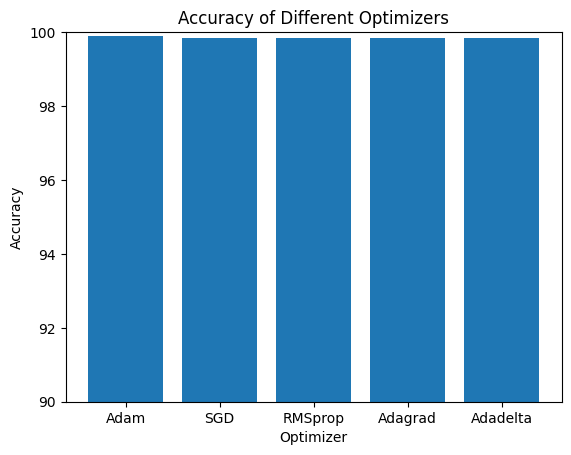

In [25]:
import matplotlib.pyplot as plt
names = [name for name, _ in results]
accuracies = [acc for _, acc in results]
plt.bar(names, accuracies)
plt.ylim([90, 100])
plt.title('Accuracy of Different Optimizers')
plt.xlabel('Optimizer')
plt.ylabel('Accuracy')
plt.show()

In [26]:
pip install tabulate

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [27]:
from tabulate import tabulate

table_data = []
for name, acc in results:
    table_data.append([name, f'{acc:.2f}%'])

# Print the table
headers = ['Model', 'Accuracy']
print(tabulate(table_data, headers=headers))


Model     Accuracy
--------  ----------
Adam      99.90%
SGD       99.83%
RMSprop   99.83%
Adagrad   99.83%
Adadelta  99.83%


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the models
models = []
models.append(('Adam', Sequential([Dense(32, activation='relu', input_shape=(30,)), Dropout(0.5), Dense(16, activation='relu'), Dropout(0.5), Dense(1, activation='sigmoid')])))
models.append(('SGD', Sequential([Dense(32, activation='relu', input_shape=(30,)), Dropout(0.5), Dense(16, activation='relu'), Dropout(0.5), Dense(1, activation='sigmoid')])))
models.append(('RMSprop', Sequential([Dense(32, activation='relu', input_shape=(30,)), Dropout(0.5), Dense(16, activation='relu'), Dropout(0.5), Dense(1, activation='sigmoid')])))

models.append(('Adagrad', Sequential([Dense(64, activation='relu', input_shape=(30,)), Dropout(0.2), Dense(32, activation='relu'), Dropout(0.2), Dense(1, activation='sigmoid')])))
models.append(('Adadelta', Sequential([Dense(64, activation='relu', input_shape=(30,)), Dropout(0.2), Dense(32, activation='relu'), Dropout(0.2), Dense(1, activation='sigmoid')])))

# Train the models
results = []
for name, model in models:
    if name == 'Adam':
        optimizer = Adam(learning_rate=0.001)
        loss = BinaryCrossentropy()
    elif name == 'SGD':
        optimizer = SGD(learning_rate=0.001)
        loss = Hinge()
    elif name == 'RMSprop':
        optimizer = RMSprop(learning_rate=0.001)
        loss = SquaredHinge()
    elif name == 'Adagrad':
        optimizer = Adagrad(learning_rate=0.01)
        loss = CategoricalCrossentropy()
    elif name == 'Adadelta':
        optimizer = Adadelta(learning_rate=0.001)
        loss = MeanSquaredError()
    else:
        continue
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=64, verbose=0)
    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.5).astype(int)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append((name, acc * 100.0, precision, recall, f1))

# Print the results
for name, acc, precision, recall, f1 in results:
    print("%s: Accuracy=%.2f%%, Precision=%.2f, Recall=%.2f, F1=%.2f" % (name, acc, precision, recall, f1))


1781/1781 [==============================] - 2s 1ms/step


C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1781/1781 [==============================] - 3s 2ms/step


C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1781/1781 [==============================] - 3s 2ms/step


C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1781/1781 [==============================] - 3s 1ms/step
Adam: Accuracy=99.94%, Precision=0.84, Recall=0.78, F1=0.80
SGD: Accuracy=99.83%, Precision=0.00, Recall=0.00, F1=0.00
RMSprop: Accuracy=99.83%, Precision=0.00, Recall=0.00, F1=0.00
Adagrad: Accuracy=99.83%, Precision=0.00, Recall=0.00, F1=0.00
Adadelta: Accuracy=99.83%, Precision=0.00, Recall=0.00, F1=0.00


C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
import pandas as pd

# Define a list of dictionaries containing the results
results_dict = []
for name, acc, precision, recall, f1 in results:
    results_dict.append({'Model': name, 'Accuracy': acc, 'Precision': precision, 'Recall': recall, 'F1': f1})

# Create a pandas DataFrame from the list of dictionaries
results_df = pd.DataFrame(results_dict)

# Print the DataFrame
print(results_df.to_string(index=False))


   Model  Accuracy  Precision  Recall       F1
    Adam 99.935044   0.835165 0.77551 0.804233
     SGD 99.827955   0.000000 0.00000 0.000000
 RMSprop 99.827955   0.000000 0.00000 0.000000
 Adagrad 99.827955   0.000000 0.00000 0.000000
Adadelta 99.827955   0.000000 0.00000 0.000000


In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tabulate import tabulate

# Define the models
models = []
models.append(('Adam', Sequential([Dense(32, activation='relu', input_shape=(30,)), Dropout(0.5), Dense(16, activation='relu'), Dropout(0.5), Dense(1, activation='sigmoid')])))
models.append(('SGD', Sequential([Dense(32, activation='relu', input_shape=(30,)), Dropout(0.5), Dense(16, activation='relu'), Dropout(0.5), Dense(1, activation='sigmoid')])))
models.append(('RMSprop', Sequential([Dense(32, activation='relu', input_shape=(30,)), Dropout(0.5), Dense(16, activation='relu'), Dropout(0.5), Dense(1, activation='sigmoid')])))

models.append(('Adagrad', Sequential([Dense(64, activation='relu', input_shape=(30,)), Dropout(0.2), Dense(32, activation='relu'), Dropout(0.2), Dense(1, activation='sigmoid')])))
models.append(('Adadelta', Sequential([Dense(64, activation='relu', input_shape=(30,)), Dropout(0.2), Dense(32, activation='relu'), Dropout(0.2), Dense(1, activation='sigmoid')])))

# Train the models
results = []
for name, model in models:
    if name == 'Adam':
        optimizer = Adam(learning_rate=0.001)
        loss = BinaryCrossentropy()
    elif name == 'SGD':
        optimizer = SGD(learning_rate=0.001)
        loss = Hinge()
    elif name == 'RMSprop':
        optimizer = RMSprop(learning_rate=0.001)
        loss = SquaredHinge()
    elif name == 'Adagrad':
        optimizer = Adagrad(learning_rate=0.01)
        loss = CategoricalCrossentropy()
    elif name == 'Adadelta':
        optimizer = Adadelta(learning_rate=0.001)
        loss = MeanSquaredError()
    else:
        continue
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=64, verbose=0)
    y_pred = model.predict(X_test)
    y_pred = (y_pred > 0.5).astype(int)
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append((name, acc * 100.0, precision, recall, f1))

# Print the results in tabular form
table_headers = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1']
table_data = [[name, acc, precision, recall, f1] for name, acc, precision, recall, f1 in results]
print(tabulate(table_data, headers=table_headers))


1781/1781 [==============================] - 3s 2ms/step


C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1781/1781 [==============================] - 3s 2ms/step


C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1781/1781 [==============================] - 3s 1ms/step


C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1781/1781 [==============================] - 3s 2ms/step
Model       Accuracy    Precision    Recall        F1
--------  ----------  -----------  --------  --------
Adam         99.9245     0.831325  0.704082  0.762431
SGD          99.828      0         0         0
RMSprop      99.828      0         0         0
Adagrad      99.828      0         0         0
Adadelta     99.828      0         0         0


C:\Users\DELL\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
